In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/Others/Ehsan/wheat/data_for_scatter_plots/"

plot_dir = data_dir + "plots/"
os.makedirs(plot_dir, exist_ok=True)

# Functions

In [3]:
def fit_model_2_y_and_yhat_Ehsan(y, yhat):
    coefficients_ = np.polyfit(y.values.flatten(), yhat.values.flatten(), 1)
    best_line = coefficients_[1] + coefficients_[0] * y.values.flatten()
    return best_line # why this name?

def fit_model_2_y_and_yhat_Ehsan_v2(y, yhat):
    coefficients_ = np.polyfit(y.values.flatten(), yhat.values.flatten(), 1)
    
    x0 = np.min([np.min(y.values.flatten()), np.min(yhat.values.flatten())])
    x1 = np.max([np.max(y.values.flatten()), np.max(yhat.values.flatten())])
    x0_x1 = np.array([x0, x1])
    y0_y1 = coefficients_[1] + coefficients_[0] * x0_x1
    return (x0_x1, y0_y1) # why this name?


def fit_model_2_y_and_yhat_HN(y, yhat):
    coefficients_ = np.polyfit(y.values.flatten(), yhat.values.flatten(), 1)
    
    x0 = np.min([np.min(y.values.flatten()), np.min(yhat.values.flatten())])
    x1 = np.max([np.max(y.values.flatten()), np.max(yhat.values.flatten())])
    x0_x1 = np.array([x0-5, x1+5])
    y0_y1 = coefficients_[1] + coefficients_[0] * x0_x1
    return (x0_x1, y0_y1) # why this name?


def corr_MAE(y, yhat):
    y = y.values.flatten()
    yhat = yhat.values.flatten()
    
    corr_coef = np.corrcoef(y, yhat)[0, 1]
    mae = np.mean(np.abs((yhat - y) / y)) * 100
    
    return (corr_coef, mae)

## Read Data

In [4]:
y_test_rf_tw = pd.read_excel(data_dir + 'y_test_rf_tw.xlsx')
y_test_pred_rf_tw = pd.read_excel(data_dir + 'y_test_pred_rf_tw.xlsx')

In [5]:
def plot_the_damn_thing_Ehsan(y, y_hat, xlabel_, ylabel_):
    best_fit_line_constrained = fit_model_2_y_and_yhat_Ehsan(y=y, yhat=y_hat)
    plt.scatter(y, y_hat, alpha=0.7, color='black', s=10)
    plt.plot(y, best_fit_line_constrained, color='red', linewidth=line_w)

    x = np.linspace(0, max(y.values.flatten())+5, 2)
    plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=xy_line_w, alpha=0.7)
    corr_coef, mae = corr_MAE(y=y, yhat=y_hat)

    plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}',
             transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
             bbox=box_dict)
    
    plt.text(8, 11, f'y = x', fontsize=text_fontsize, color=xy_line_c, rotation=40)
    
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.grid(True)

## Ehsan Taste

#### General Plot Parameters for Ehsan

In [6]:
### Set Fonts once, especially if all plots here are of the same size/kind
box_dict = dict(facecolor='white', alpha=0.5)
dpi_, map_dpi_ = 300, 300
save_dpi = 1000

xy_line_c, xy_line_s = "dodgerblue", "--"
xy_line_w, line_w = 1, 3

tick_legend_FontSize = 4
text_fontsize = tick_legend_FontSize*4
params = {"font.family": "Arial",
          "legend.fontsize": tick_legend_FontSize * 1.5,
          "axes.labelsize": tick_legend_FontSize * 4,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 4,
          "ytick.labelsize": tick_legend_FontSize * 4,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
#          'axes.linewidth' : .05
         }
plt.rcParams.update(params)

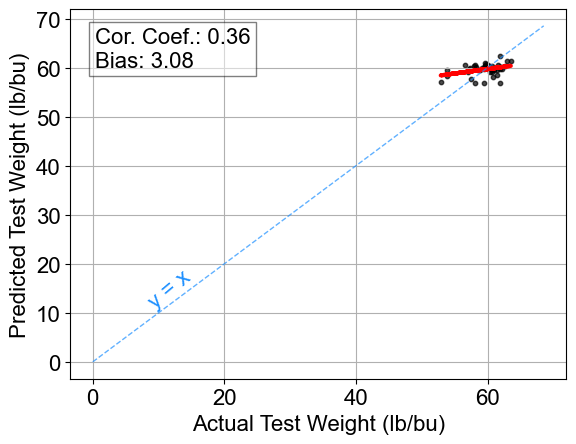

In [7]:
plot_the_damn_thing_Ehsan(y=y_test_rf_tw, y_hat=y_test_pred_rf_tw, 
                          xlabel_ = "Actual Test Weight (lb/bu)", 
                          ylabel_ = "Predicted Test Weight (lb/bu)")

file_name = plot_dir + "tw_EhsanTaste"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".pdf", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

## Hossein Taste

In [11]:
### Set Fonts once, especially if all plots here are of the same size/kind
box_dict = dict(facecolor='white', alpha=0.5)
dpi_ = map_dpi_ = 300

xy_line_c, xy_line_s = "dodgerblue", "-"
xy_line_w, line_w = .8, 1.2
xy_fontname = "Comic Sans MS" # "Times New Roman", or "Arial" or "Palatino" or "Comic Sans MS"
other_fonts = "Times New Roman"

tick_legend_FontSize = 1
text_fontsize = 6
params = {"font.family": other_fonts,
          "legend.fontsize": tick_legend_FontSize * 5,
          "axes.labelsize": tick_legend_FontSize * 7,
          "axes.titlesize": tick_legend_FontSize * 3,
          "xtick.labelsize": tick_legend_FontSize * 6,
          "ytick.labelsize": tick_legend_FontSize * 6,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
          'axes.linewidth' : .4
         }
plt.rcParams.update(params)

def plot_the_damn_thing2(y, y_hat, xlabel_, ylabel_):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=dpi_)
    
    ax.scatter(y, y_hat, alpha=.9, color='black', s=.8, zorder=3)
    
    x0_x1, y0_y1 = fit_model_2_y_and_yhat_HN(y=y, yhat=y_hat)
    ax.plot(x0_x1, y0_y1, color='red', linewidth=line_w, zorder=3)
    
    corr_coef, mae = corr_MAE(y=y, yhat=y_hat)
    ax.text(0.05, 0.95, f'r = {corr_coef:.2f}\nBias = {mae:.2f}',
             transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top')
    
    ####### y = x line
    strech = 0.5
    xx = (min(y.values.flatten()) + max(y.values.flatten())) / 2
    x_0 = int (xx - strech * xx) - 1
    x_1 = int (xx + strech * xx) + 1
    
    x = np.linspace(x_0, x_1, 2)
    ax.plot(x, x, color=xy_line_c, linewidth=xy_line_w, zorder=1, 
            label=f"$y=x$", alpha=0.7, linestyle=xy_line_s)

    # Choose one of the following
    plt.text(x_0, x_0+3.5, f'y = x', fontname=xy_fontname, 
             fontsize=text_fontsize, color=xy_line_c, rotation=40)
    # ax.legend(bbox_to_anchor=(.35, 0.85), frameon=False)    
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(x), np.max(x))
    # Plot settings
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    ax.tick_params(length=2, width=.5, color="gray")
    ax.grid(axis="y")
#     ax.set_xticks(ax.get_yticks())
#     ax.set_yticks(ax.get_xticks())

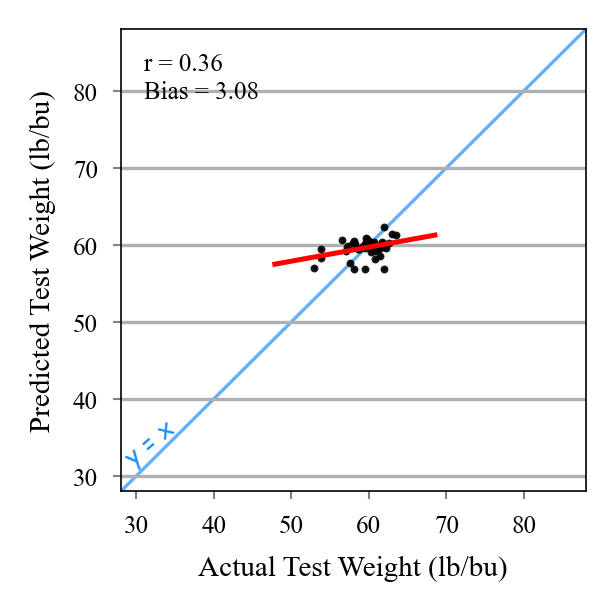

In [12]:
plot_the_damn_thing2(y=y_test_rf_tw, y_hat=y_test_pred_rf_tw, 
                     xlabel_ = "Actual Test Weight (lb/bu)", 
                     ylabel_ = "Predicted Test Weight (lb/bu)")

file_name = plot_dir + "tw_HN_Grid"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=save_dpi) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=save_dpi) 
plt.savefig(file_name + ".pdf", bbox_inches='tight', dpi=save_dpi) # light, not 4 Microsoft prods.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family '

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family '

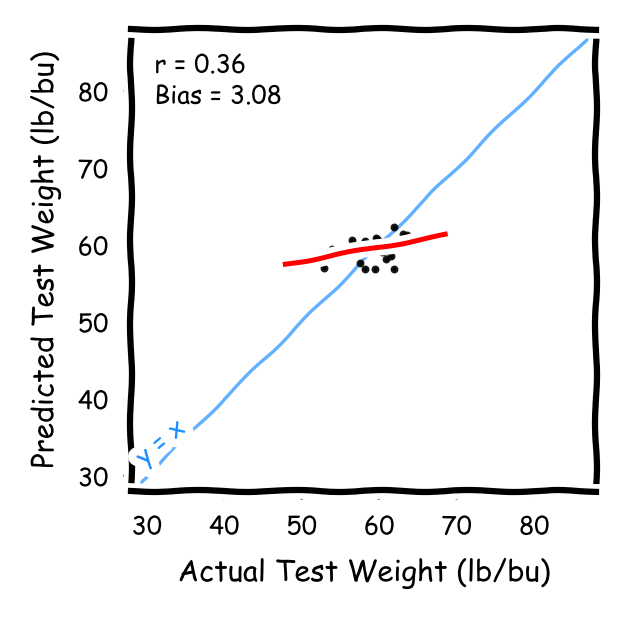

In [11]:
with plt.xkcd():
    plot_the_damn_thing2(y=y_test_rf_tw, y_hat=y_test_pred_rf_tw, 
                     xlabel_ = "Actual Test Weight (lb/bu)", 
                     ylabel_ = "Predicted Test Weight (lb/bu)")
    file_name = plot_dir + "tw_XKCD"
    plt.savefig(file_name + ".png", bbox_inches='tight', dpi=save_dpi) # heavy
    plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=save_dpi) 
    plt.savefig(file_name + ".pdf", bbox_inches='tight', dpi=save_dpi) # light, not 4 Microsoft prods.

C:\Users\e.norouzikandlati\AppData\Local\Temp\ipykernel_127104\1951217044.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\e.norouzikandlati\AppData\Local\Temp\ipykernel_127104\1951217044.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
C:\Users\e.norouzikandlati\AppData\Local\Temp\ipykernel_127104\1951217044.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


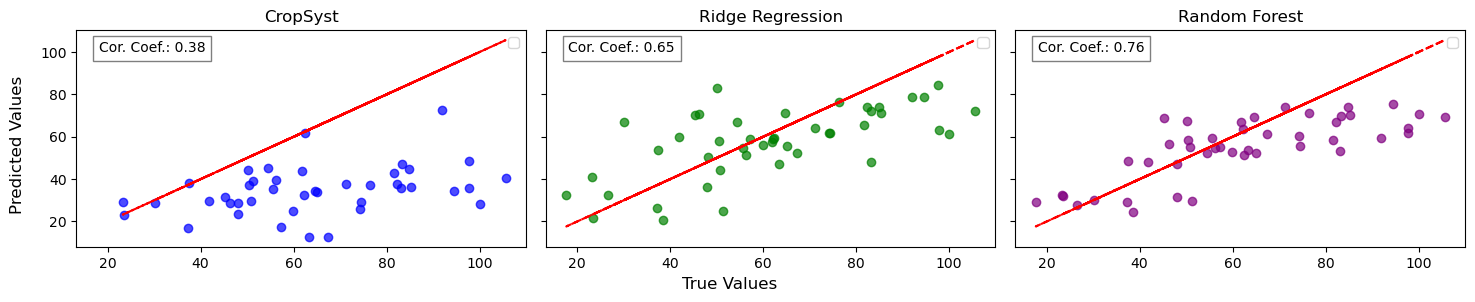

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharex=True, sharey=True)

# Scatter plot for CS Model
axes[0].scatter(y_test_cs, y_test_pred_cs, alpha=0.7, color=xy_line_c)
axes[0].plot(y_test_cs, y_test_cs, color='red', linestyle=xy_line_s, linewidth=line_w)
axes[0].set_title('CropSyst')
axes[0].legend()
# Add text box
axes[0].text(0.05, 0.95, 'Cor. Coef.: 0.38', transform=axes[0].transAxes,
             fontsize=10, verticalalignment='top', bbox=box_dict)

# Scatter plot for Ridge Model
axes[1].scatter(y_test_ridge, y_test_pred_ridge, alpha=0.7, color='green')
axes[1].plot(y_test_ridge, y_test_ridge, color='red', linestyle=xy_line_s, linewidth=line_w)
axes[1].set_title('Ridge Regression')
axes[1].legend()
# Add text box
axes[1].text(0.05, 0.95, 'Cor. Coef.: 0.65', transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', bbox=box_dict)

# Scatter plot for RF Model
axes[2].scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='purple')
axes[2].plot(y_test_rf, y_test_rf, color='red', linestyle=xy_line_s, linewidth=line_w)
axes[2].set_title('Random Forest')
axes[2].legend()
# Add text box
axes[2].text(0.05, 0.95, 'Cor. Coef.: 0.76', transform=axes[2].transAxes,
             fontsize=10, verticalalignment='top', bbox=box_dict)

# Set common x and y labels
fig.text(0.5, 0.02, 'True Values', ha='center', fontsize=12)  # x-axis title
fig.text(0.02, 0.5, 'Predicted Values', va='center', rotation='vertical', fontsize=12)  # y-axis title

plt.tight_layout(rect=[0.03, 0.03, 1, 1]) 



In [1]:
### Why 2 subplots but only plot in 1?
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True, sharey=True)


# Scatter plot for RF Model
axes[1].scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='purple')
axes[1].plot(y_test_rf, y_test_rf, color='red', linestyle=xy_line_s, linewidth=line_w)
axes[1].set_title('Random Forest')
axes[1].legend()
# Add text box
axes[1].text(0.05, 0.95, 'Cor. Coef.: 0.16', transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', bbox=box_dict)

# Set common x and y labels
fig.text(0.5, 0.02, 'True Values', ha='center', fontsize=12)  # x-axis title
fig.text(0.02, 0.5, 'Predicted Values', va='center', rotation='vertical', fontsize=12)  # y-axis title

plt.tight_layout(rect=[0.03, 0.03, 1, 1]) 


file_name = plot_dir + "hd"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

NameError: name 'plt' is not defined

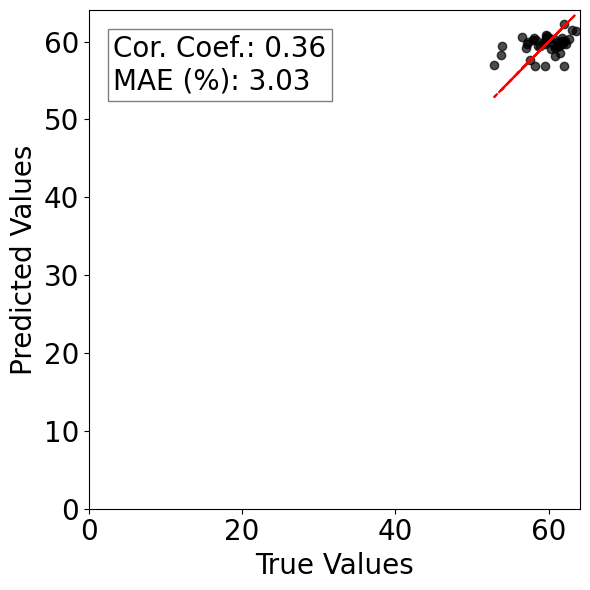

In [174]:
# Create a single figure
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot for Random Forest Model
ax.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
ax.plot(y_test_rf, y_test_rf, color='red', linestyle=xy_line_s, linewidth=line_w)
#ax.set_title('Random Forest', fontsize=14)

# Add text box with Correlation Coefficient and MAE
ax.text(0.05, 0.95, 'Cor. Coef.: 0.36\nMAE (%): 3.03', transform=ax.transAxes,
        fontsize=text_fontsize, verticalalignment='top', bbox=box_dict)

ax.tick_params(axis='both', labelsize=20)
# Set x and y labels
ax.set_xlabel('True Values', fontsize=20)
ax.set_ylabel('Predicted Values', fontsize=20)

# Set axis limits to start from zero
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

file_name = plot_dir + "tw"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

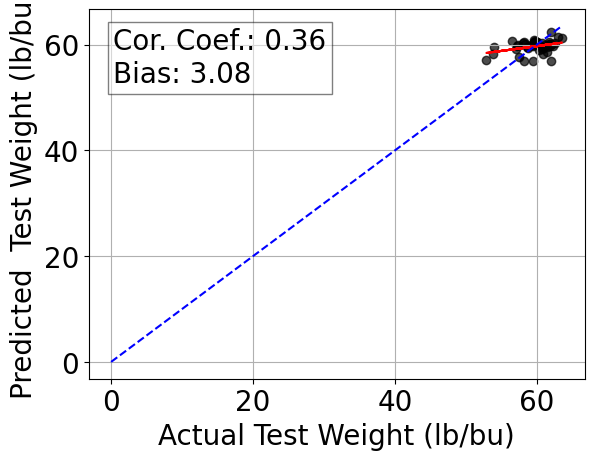

In [177]:
# Best fit line constrained to start at (0,0)
best_fit_line_constrained = fit_model_2_y_and_yhat(y=y_test_rf, yhat=y_test_pred_rf)

# Scatter plot
plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
plt.plot(y_test_rf, best_fit_line_constrained, color='red', linewidth=line_w)
x = np.linspace(0, max(y_test_rf.values.flatten()), 2)
plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=line_w)

# Add text box with Correlation Coefficient and MAE
corr_coef, mae = corr_MAE(y, yhat)

plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}', 
         transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
         bbox=box_dict)

# Plot settings
plt.xlabel("Actual Test Weight (lb/bu)")
plt.ylabel("Predicted  Test Weight (lb/bu)")
plt.grid(True)

file_name = plot_dir + "tw"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

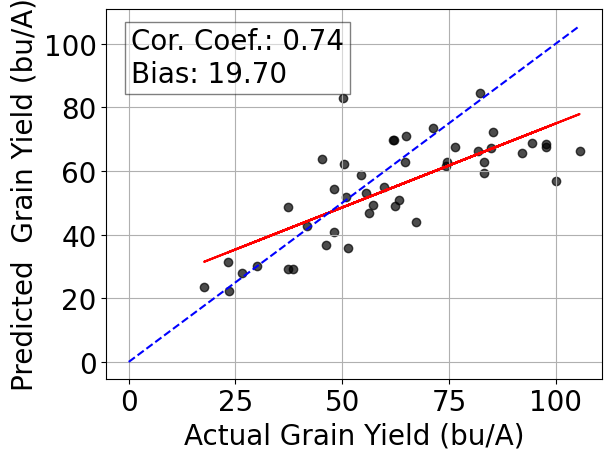

In [178]:
# Load data
y_test_rf = pd.read_excel('y_test_rf_gy.xlsx')
y_test_pred_rf = pd.read_excel('y_test_pred_rf_gy.xlsx')

best_fit_line_constrained = fit_model_2_y_and_yhat(y=y_test_rf, yhat=y_test_pred_rf)

# Scatter plot
plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
plt.plot(y_test_rf, best_fit_line_constrained, color='red', linewidth=line_w)

x = np.linspace(0, max(y_test_rf.values.flatten()), 2)
plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=line_w)

# Add text box with Correlation Coefficient and MAE
corr_coef, mae = corr_MAE(y=y_test_rf, yhat=y_test_pred_rf)

plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}',
         transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
         bbox=box_dict)

# Plot settings
plt.xlabel("Actual Grain Yield (bu/A)")
plt.ylabel("Predicted  Grain Yield (bu/A)")
plt.grid(True)

file_name = plot_dir + "tw"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

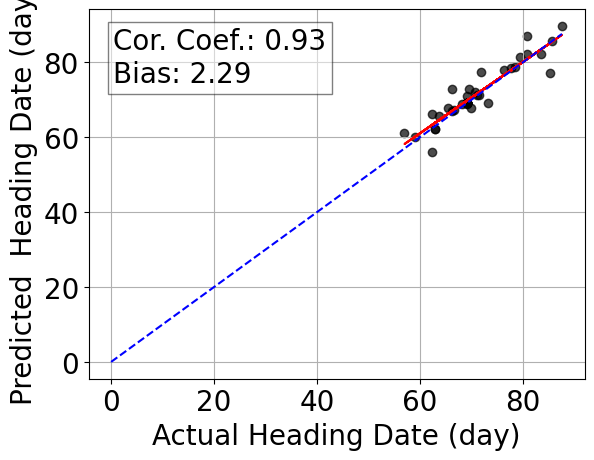

In [179]:
# Load data
y_test_rf = pd.read_excel('y_test_rf_hd.xlsx')
y_test_pred_rf = pd.read_excel('y_test_pred_rf_hd.xlsx')
best_fit_line_constrained = fit_model_2_y_and_yhat(y=y_test_rf, yhat=y_test_pred_rf)

# Scatter plot
plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
plt.plot(y_test_rf, best_fit_line_constrained, color='red', linewidth=line_w)

x = np.linspace(0, max(y_test_rf.values.flatten()), 2)
plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=line_w)

# Add text box with Correlation Coefficient and MAE
corr_coef, mae = corr_MAE(y=y_test_rf, yhat=y_test_pred_rf)


plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}',
         transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
         bbox=box_dict)

# Plot settings
plt.xlabel("Actual Heading Date (day)")
plt.ylabel("Predicted  Heading Date (day)")
plt.grid(True)

file_name = plot_dir + "hd"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

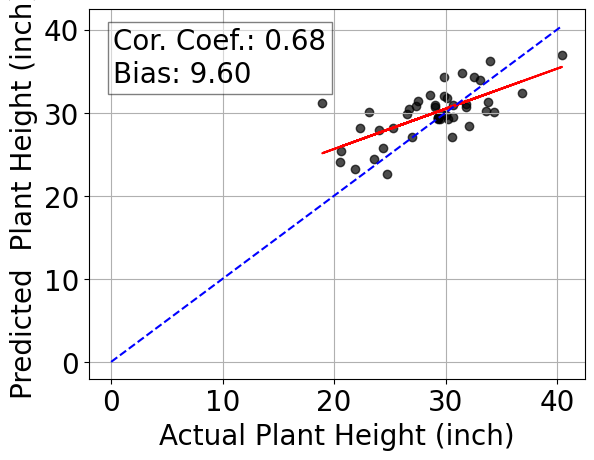

In [180]:
# Load data
y_test_rf = pd.read_excel('y_test_rf_ph.xlsx')
y_test_pred_rf = pd.read_excel('y_test_pred_rf_ph.xlsx')
best_fit_line_constrained = fit_model_2_y_and_yhat(y=y_test_rf, yhat=y_test_pred_rf)

plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
plt.plot(y_test_rf, best_fit_line_constrained, color='red', linewidth=line_w)
x = np.linspace(0, max(y_test_rf.values.flatten()), 2)
plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=line_w)

# Add text box with Correlation Coefficient and MAE
corr_coef, mae = corr_MAE(y=y_test_rf, yhat=y_test_pred_rf)

plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}',
         transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
         bbox=box_dict)

# Plot settings
plt.xlabel("Actual Plant Height (inch)")
plt.ylabel("Predicted Plant Height (inch)")
plt.grid(True)

file_name = plot_dir + "ph"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.

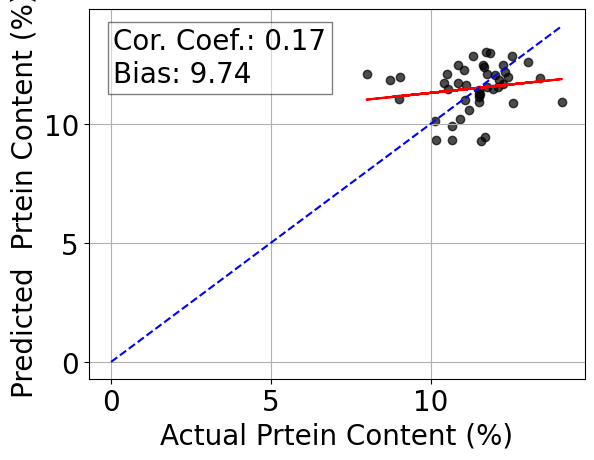

In [181]:
# Load data
y_test_rf = pd.read_excel('y_test_rf_pc.xlsx')
y_test_pred_rf = pd.read_excel('y_test_pred_rf_pc.xlsx')
best_fit_line_constrained = fit_model_2_y_and_yhat(y=y_test_rf, yhat=y_test_pred_rf)

plt.scatter(y_test_rf, y_test_pred_rf, alpha=0.7, color='black')
plt.plot(y_test_rf, best_fit_line_constrained, color='red', linewidth=line_w)

x = np.linspace(0, max(y_test_rf.values.flatten()), 2)
plt.plot(x, x, color=xy_line_c, linestyle=xy_line_s, linewidth=line_w)

# Add text box with Correlation Coefficient and MAE
corr_coef, mae = corr_MAE(y=y_test_rf, yhat=y_test_pred_rf)

plt.text(0.05, 0.95, f'Cor. Coef.: {corr_coef:.2f}\nBias: {mae:.2f}',
         transform=plt.gca().transAxes, fontsize=text_fontsize, verticalalignment='top',
         bbox=box_dict)

# Plot settings
plt.xlabel("Actual Protein Content (%)")
plt.ylabel("Predicted  Protein Content (%)")
plt.grid(True)

file_name = plot_dir + "pc"
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # heavy
plt.savefig(file_name + ".jpg", bbox_inches='tight', dpi=map_dpi_) 
plt.savefig(file_name + ".png", bbox_inches='tight', dpi=map_dpi_) # light, not 4 Microsoft prods.